In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
%matplotlib inline
import wbgapi as wb
import matplotlib.patches as patches

In [26]:
url = "https://github.com/worldbank/r-econ-visual-library/raw/master/Library/Data/HorizontalGroupSE.dta"

data = pd.read_stata(url)
data


,active,case,correct,cp_1,cp_2,cp_16,dr_1,dr_3,facilitycode,false,...,correct_treatment,checklist_n,med_any,sp_code,city_patna,city_mumbai,city_delhi,id,case1,city
0,NaN,Case 2,1,Delhi,1,NaN,Yes,Referral,9050153,0.0,...,1,1,0,Rubi Kumari,1,0,1,1,1,Delhi
1,NaN,Case 1,0,Delhi,1,NaN,No,No Referral,9050153,0.0,...,0,0,1,Sudhir Kumar,1,0,1,1,1,Delhi
2,NaN,Case 2,1,Delhi,1,NaN,No,Referral,9050154,0.0,...,1,1,0,Rubi Kumari,1,0,1,2,1,Delhi
3,NaN,Case 1,1,Delhi,1,NaN,No,Referral,9050154,0.0,...,0,0,1,Sudhir Kumar,1,0,1,2,1,Delhi
4,NaN,Case 1,0,Delhi,1,NaN,No,No Referral,9050155,0.0,...,0,1,1,Sudhir Kumar,1,0,1,3,1,Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,NaN,Case 1,0,Mumbai,3,0.500000,No,No Referral,QC9PN1005,NaN,...,0,0,1,Dananjay Kumar,1,1,0,620,1,Mumbai
1196,NaN,Case 1,0,Mumbai,3,0.416667,No,No Referral,QC9PN1006,NaN,...,0,0,1,Dananjay Kumar,1,1,0,621,1,Mumbai
1197,NaN,Case 2,0,Mumbai,3,1.733333,No,No Referral,QC9PN1006,NaN,...,0,1,1,Tej Bahadur,1,1,1,621,1,Mumbai
1198,NaN,Case 2,0,Mumbai,3,1.550000,No,No Referral,QC9PN1007,NaN,...,0,1,1,Tej Bahadur,1,1,1,622,1,Mumbai


In [27]:
data['dr_3'] = data['dr_3'].map({'No Referral': 0, 'Referral': 1})
data[["dr_3"]] = data[["dr_3"]].apply(pd.to_numeric)


In [28]:
data['med_b2_any_antibiotic'] = data['med_b2_any_antibiotic'].map({'No Antibiotic': 0, 'Gave Antibiotic': 1})
data[["med_b2_any_antibiotic"]] = data[["med_b2_any_antibiotic"]].apply(pd.to_numeric)



In [29]:
data['med_b2_any_steroid'] = data['med_b2_any_steroid'].map({'No Steroid': 0, 'Gave Steroid': 1})
data[["med_b2_any_steroid"]] = data[["med_b2_any_steroid"]].apply(pd.to_numeric)


In [30]:
data['med_l_any_2'] = data['med_l_any_2'].map({'No': 0, 'Fluoroquinolone': 1})
data[["med_l_any_2"]] = data[["med_l_any_2"]].apply(pd.to_numeric)


In [31]:
data['med_l_any_1'] = data['med_l_any_1'].map({'No': 0})
data[["med_l_any_1"]] = data[["med_l_any_1"]].apply(pd.to_numeric)


In [33]:
data2= (data
       .groupby(['city'])
       .agg({'city':'first', "dr_3":'mean', 
             "correct_treatment":'mean', "med_b2_any_antibiotic":'mean', 
             "med_b2_any_steroid":'mean', "med_b2_any_antister":'mean', 
              "med_l_any_2":'mean', "med_b2_any_schedule_h":'mean', 
             "med_b2_any_schedule_h1":'mean', "med_b2_any_schedule_x":'mean', 
             "med_l_any_1":'mean'}))

data2


,city,dr_3,correct_treatment,med_b2_any_antibiotic,med_b2_any_steroid,med_b2_any_antister,med_l_any_2,med_b2_any_schedule_h,med_b2_any_schedule_h1,med_b2_any_schedule_x,med_l_any_1
city,,,,,,,,,,,
Delhi,Delhi,0.576923,0.509615,0.298077,0.105769,0.307692,0.000000,0.480769,0.086538,0.0,0.0
Mumbai,Mumbai,0.372483,0.343960,0.159396,0.006711,0.162752,0.013423,0.541946,0.008389,0.0,0.0
Patna,Patna,0.430000,0.388000,0.386000,0.092000,0.410000,0.152000,0.432000,0.084000,0.0,0.0


In [109]:
data2_2 = pd.melt(data2, id_vars=['city'], value_vars=['dr_3', 'correct_treatment', 'med_b2_any_antibiotic', 'med_b2_any_steroid', 'med_b2_any_antister', 'med_l_any_2', 'med_b2_any_schedule_h', 'med_b2_any_schedule_h1', 'med_b2_any_schedule_x', 'med_l_any_1'])
data2_2


,city,variable,value
0,Delhi,dr_3,0.576923
1,Mumbai,dr_3,0.372483
2,Patna,dr_3,0.430000
3,Delhi,correct_treatment,0.509615
4,Mumbai,correct_treatment,0.343960
5,Patna,correct_treatment,0.388000
6,Delhi,med_b2_any_antibiotic,0.298077
7,Mumbai,med_b2_any_antibiotic,0.159396
8,Patna,med_b2_any_antibiotic,0.386000
9,Delhi,med_b2_any_steroid,0.105769


In [116]:
data2_2.rename(columns={'value': 'mean'}, inplace=True)
data2_2

,city,variable,mean
0,Delhi,dr_3,0.576923
1,Mumbai,dr_3,0.372483
2,Patna,dr_3,0.430000
3,Delhi,correct_treatment,0.509615
4,Mumbai,correct_treatment,0.343960
5,Patna,correct_treatment,0.388000
6,Delhi,med_b2_any_antibiotic,0.298077
7,Mumbai,med_b2_any_antibiotic,0.159396
8,Patna,med_b2_any_antibiotic,0.386000
9,Delhi,med_b2_any_steroid,0.105769


In [35]:
data3= (data
       .groupby(['city'])
       .agg({'city':'first', "dr_3":'sem', 
             "correct_treatment":'sem', "med_b2_any_antibiotic":'sem', 
             "med_b2_any_steroid":'sem', "med_b2_any_antister":'sem', 
              "med_l_any_2":'sem', "med_b2_any_schedule_h":'sem', 
             "med_b2_any_schedule_h1":'sem', "med_b2_any_schedule_x":'sem', 
             "med_l_any_1":'sem'}))

data3


,city,dr_3,correct_treatment,med_b2_any_antibiotic,med_b2_any_steroid,med_b2_any_antister,med_l_any_2,med_b2_any_schedule_h,med_b2_any_schedule_h1,med_b2_any_schedule_x,med_l_any_1
city,,,,,,,,,,,
Delhi,Delhi,0.048680,0.049257,0.045070,0.030303,0.045477,0.000000,0.049230,0.027703,0.0,0.0
Mumbai,Mumbai,0.019820,0.019474,0.015006,0.003347,0.015133,0.004718,0.020426,0.003739,0.0,0.0
Patna,Patna,0.022163,0.021814,0.021794,0.012939,0.022017,0.016072,0.022175,0.012418,0.0,0.0


In [111]:
data3_2 = pd.melt(data3, id_vars=['city'], value_vars=['dr_3', 'correct_treatment', 'med_b2_any_antibiotic', 'med_b2_any_steroid', 'med_b2_any_antister', 'med_l_any_2', 'med_b2_any_schedule_h', 'med_b2_any_schedule_h1', 'med_b2_any_schedule_x', 'med_l_any_1'])
data3_2


,city,variable,value
0,Delhi,dr_3,0.048680
1,Mumbai,dr_3,0.019820
2,Patna,dr_3,0.022163
3,Delhi,correct_treatment,0.049257
4,Mumbai,correct_treatment,0.019474
5,Patna,correct_treatment,0.021814
6,Delhi,med_b2_any_antibiotic,0.045070
7,Mumbai,med_b2_any_antibiotic,0.015006
8,Patna,med_b2_any_antibiotic,0.021794
9,Delhi,med_b2_any_steroid,0.030303


In [124]:
data3_2.rename(columns={'value': 'sem', 'city': 'city2', 'variable': 'variable2'}, inplace=True)
data3_2


,city2,variable2,sem
0,Delhi,dr_3,0.048680
1,Mumbai,dr_3,0.019820
2,Patna,dr_3,0.022163
3,Delhi,correct_treatment,0.049257
4,Mumbai,correct_treatment,0.019474
5,Patna,correct_treatment,0.021814
6,Delhi,med_b2_any_antibiotic,0.045070
7,Mumbai,med_b2_any_antibiotic,0.015006
8,Patna,med_b2_any_antibiotic,0.021794
9,Delhi,med_b2_any_steroid,0.030303


In [125]:
dataf = pd.concat([data2_2, data3_2], axis=1)
dataf

,city,variable,mean,city2,variable2,sem
0,Delhi,dr_3,0.576923,Delhi,dr_3,0.048680
1,Mumbai,dr_3,0.372483,Mumbai,dr_3,0.019820
2,Patna,dr_3,0.430000,Patna,dr_3,0.022163
3,Delhi,correct_treatment,0.509615,Delhi,correct_treatment,0.049257
4,Mumbai,correct_treatment,0.343960,Mumbai,correct_treatment,0.019474
5,Patna,correct_treatment,0.388000,Patna,correct_treatment,0.021814
6,Delhi,med_b2_any_antibiotic,0.298077,Delhi,med_b2_any_antibiotic,0.045070
7,Mumbai,med_b2_any_antibiotic,0.159396,Mumbai,med_b2_any_antibiotic,0.015006
8,Patna,med_b2_any_antibiotic,0.386000,Patna,med_b2_any_antibiotic,0.021794
9,Delhi,med_b2_any_steroid,0.105769,Delhi,med_b2_any_steroid,0.030303


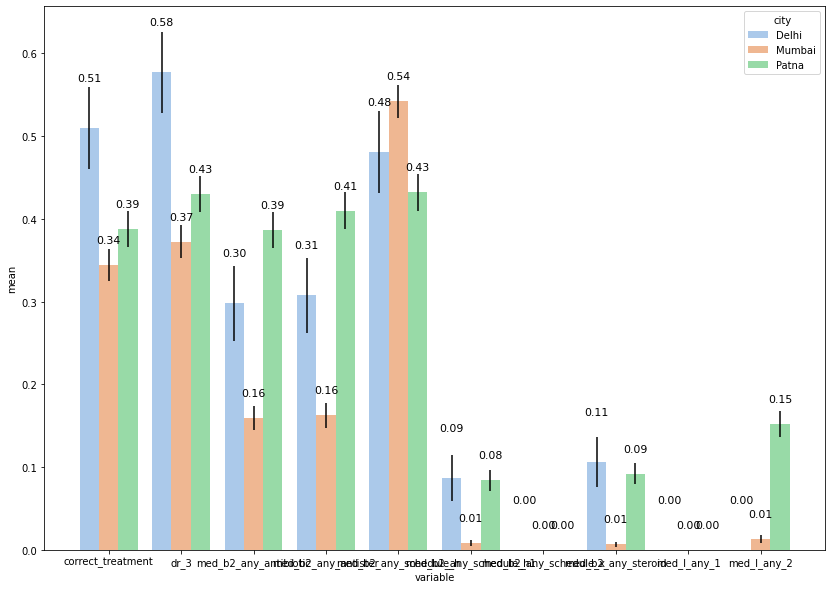

In [194]:
dataf = dataf.sort_values(['city', 'variable'])


plt.figure(figsize=(14,10))

ax = sns.barplot(data=dataf, x = 'variable', y ='mean', hue ='city', palette = 'pastel')

x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
ax.errorbar(x=x_coords, y=y_coords, yerr=dataf["sem"], fmt="none", c="k")

plt.bar_label(ax.containers[0], fmt='%.2f', fontsize = 11, padding=45)
plt.bar_label(ax.containers[1], fmt='%.2f', fontsize = 11, padding=20)
plt.bar_label(ax.containers[2], fmt='%.2f', fontsize = 11, padding=20)

plt.show()

